# Polynomial regression 
### Linear and polynomial regression with the SALARY dataset
You'll be using different types of regression to predict the salary of employes, based on historical salaries.

**1. Importing modules needed for the work**

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')  #this will ignore the warnings.it wont display warnings in notebook

**2. Importing the salary data**

In [2]:
dataset=pd.read_csv('./input/Position_Salaries.csv')
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


We can see that the dataset has 10 levels and the corresponding salary paid to the employee

> #### We only have one usable feature in this dataset
> The features 'Position' and 'Level' are redundant.
> The **regressor** is the column 'Level'

In [3]:
# extracting the regressor/column/feature 'Level'
X=dataset.iloc[:,1:2].values  
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

> #### We now need to extract the regressand, that is the variable that we eventually want to be able to predict
> the **regressand** is the column 'Salary'

In [4]:
# Extracting the column 'Salary'
y=dataset.iloc[:,2].values    
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

**3. Splitting the data into training and test data**
> Typically at this point we should be splitting the dataset into train and test set. So that we can test out our model after training. However in this simple example we only have few data points. So we´ll be using all of them for training. 

> **This is a very bad thing to do!!**


In [5]:
# uncomment the following to create the training and testing datasets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

**4. Linear Regression**

In [6]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**5. Visualizing Linear Regression result**

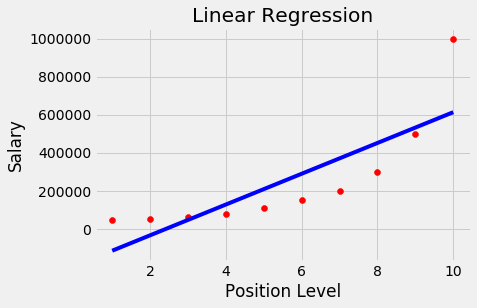

In [7]:
plt.scatter(X,y,color='red')
plt.plot(X,lin_reg.predict(X),color='blue')
plt.title('Linear Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

**6. Polynomial Regression**<br>
Since our data is distributed in a non linear way, we'll try fitting it with polynomial curves, to get more accurate models.

In [8]:
# polynomial curve of degree 2
from sklearn.preprocessing import PolynomialFeatures
poly_reg2=PolynomialFeatures(degree=2)
X_poly=poly_reg2.fit_transform(X)
lin_reg_2=LinearRegression()
lin_reg_2.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

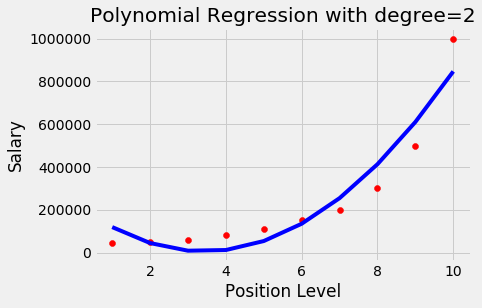

In [9]:
plt.scatter(X,y,color='red')
plt.plot(X,lin_reg_2.predict(poly_reg2.fit_transform(X)),color='blue')
#plt.plot(X,lin_reg_3.predict(poly_reg3.fit_transform(X)),color='green')
plt.title('Polynomial Regression with degree=2')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

**7. Third-degree Polynomial Regression**<br>
Since our data is still not fitting very well, we'll try fitting it with a higher-degree polynomial (degree=3), to get more accurate models.

In [10]:
# Polynomial curve of degree 3
poly_reg3=PolynomialFeatures(degree=3)
X_poly3=poly_reg3.fit_transform(X)
lin_reg_3=LinearRegression()
lin_reg_3.fit(X_poly3,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**8. Visualizing third-degree polynomial**

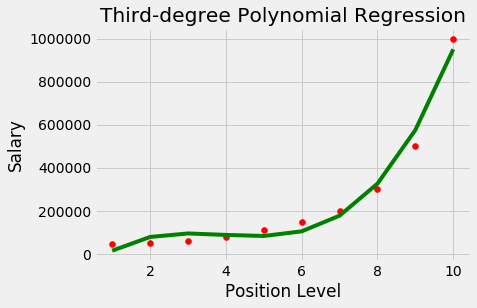

In [11]:
plt.scatter(X,y,color='red')
#plt.plot(X,lin_reg_2.predict(poly_reg2.fit_transform(X)),color='blue')
plt.plot(X,lin_reg_3.predict(poly_reg3.fit_transform(X)),color='green')
plt.title('Third-degree Polynomial Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

**8. Predicting the salary of an employee with each of the 3 curves**
Let´s use the three models to make predictions, to get a feel as to the accuracy we have achieved.
> We now want to predict the salary of an employee comprised into a new level 6.5 

In [12]:
lin_reg.predict([[6.5]])  # We are assuming the level of the employee is 6.5

array([330378.78787879])

In [13]:
lin_reg_2.predict(poly_reg2.fit_transform([[6.5]]))

array([189498.10606061])

In [14]:
lin_reg_3.predict(poly_reg3.fit_transform([[6.5]]))

array([133259.46969697])

We can clearly see that the Polynomial Regression models fit much better, compared to the Linear Regression Model. As we increase the degree of the polynomial regression the correlation increases. **Linear regression overshoots** by a large amount, ending up with a 6.5-level employee that is predicted to earn much more than the actual salary of a 7-level employee. **Not a good model!!**

> At the end of this notebook, you are required to compute the errors of each of the models more accurately, looking at the metrics introduced in one of the earlier notebooks.


## Overfitting and underfitting

**You should not be tempted into using high-degree polynomials though!!**

We always need to aim for the minimal possible degree (linear regression when possible), which has two benefits:<br>
* it is much faster to compute (particularly on big datasets)
* it avoids over-fitting

Look at the following example to appreciate the problem at hand in a qualitative way.

![PA Work Flow](./figures/underfitting_and_overfitting.png)


## Exercises for this assignment
1. First, solve this exercise in the ´incorrect´ way: don't split the dataset into training and testing sets. Tune the polynomial model. Write a script (set of functions) that, given the dataset, automatically generates all the polynomial models of degrees 1 to 10. For each model, compute MSE and R2_score. Plot the error functions (error vs degree_value). Determine the optimal degree_value.
2. Now, reuse the code you have developped, to solve the same tuning exercise in the ´correct´ way. Split the dataset into training (70% of points) and testing (30% of points), and repeat the tuning as for point 1. Determine the optimal degree_value.
3. Tuning for point 2. Change the ratio of the training set starting from 20% up to 100%, finding the optimal degree_value for each setup. 
4. Write your considerations about this exercise in a markdown cell. Compare and contrast the different results achieved for points 1 to 3.

In [15]:
from sklearn import metrics

In [16]:
# write your code here

def incorrect_training(data, degree):
    y=dataset.iloc[:,2].values
    X=dataset.iloc[:,1:2].values  
    poly_reg=PolynomialFeatures(degree=degree)
    X_poly=poly_reg.fit_transform(X)
    lin_reg=LinearRegression()
    lin_reg.fit(X_poly,y)
    pred_y = lin_reg.predict(poly_reg.fit_transform(X))
    
    return {'degree': degree, 
                'r2' : metrics.r2_score(y, pred_y),
                'mse' : metrics.mean_squared_error(y, pred_y)
           }



In [17]:
# write your code here

eval_list = [incorrect_training(dataset, i) for i in range(1, 11)]
eval_df = pd.DataFrame(eval_list)
eval_df


,degree,r2,mse
0,1,0.669041,2.669588e+10
1,2,0.916208,6.758833e+09
2,3,0.981210,1.515662e+09
3,4,0.997392,2.103438e+08
4,5,0.999797,1.638228e+07
5,6,0.999949,4.075466e+06
6,7,0.999977,1.854072e+06
7,8,0.999993,5.245269e+05
8,9,1.000000,1.637284e-03
9,10,1.000000,1.413922e-06


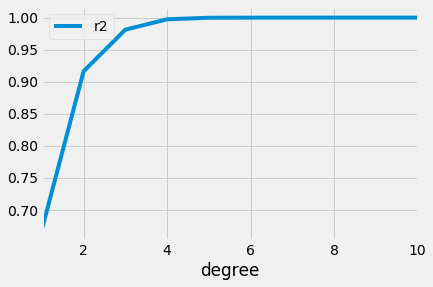

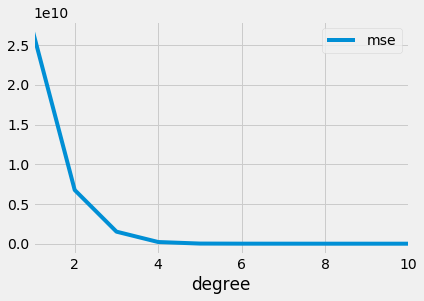

In [18]:
# write your code here
eval_df.plot.line(x='degree', y='r2')
eval_df.plot.line(x='degree', y='mse')

Optimal degree would be four.

In [19]:
def correct_training(data, degree):
    y=dataset.iloc[:,2].values
    X=dataset.iloc[:,1:2].values  
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    poly_reg=PolynomialFeatures(degree=degree)
    X_poly=poly_reg.fit_transform(X_train)
    lin_reg=LinearRegression()
    lin_reg.fit(X_poly,y_train)
    pred_y_train = lin_reg.predict(poly_reg.fit_transform(X_train))
    pred_y_test = lin_reg.predict(poly_reg.fit_transform(X_test))
    
    return {'degree': degree, 
            'r2_train' : metrics.r2_score(y_train, pred_y_train),
            'mse_train' : metrics.mean_squared_error(y_train, pred_y_train),
            'r2_test' : metrics.r2_score(y_test, pred_y_test),
            'mse_test' : metrics.mean_squared_error(y_test, pred_y_test)
           }



In [20]:
eval_list_split = [correct_training(dataset, i) for i in range(1, 11)]
eval_df_split = pd.DataFrame(eval_list_split)
eval_df_split


,degree,r2_train,mse_train,r2_test,mse_test
0,1,0.662514,3.345142e+10,0.638718,1.344770e+10
1,2,0.927128,7.223030e+09,0.789660,7.829305e+09
2,3,0.993794,6.151655e+08,0.876547,4.595179e+09
3,4,0.999679,3.177359e+07,0.972557,1.021504e+09
4,5,1.000000,4.359133e+04,0.994908,1.895411e+08
5,6,1.000000,1.472033e-11,0.995804,1.561719e+08
6,7,1.000000,9.339246e-17,0.995326,1.739737e+08
7,8,1.000000,2.768784e-15,0.993967,2.245633e+08
8,9,1.000000,2.986910e-15,0.991023,3.341335e+08
9,10,1.000000,3.346799e-15,0.975857,8.986581e+08


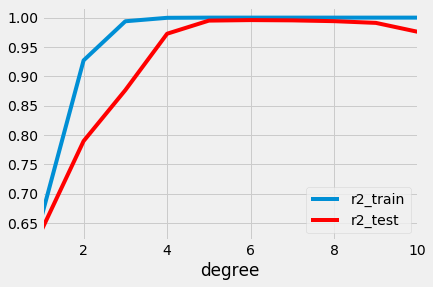

In [21]:
ax = plt.gca()

eval_df_split.plot(kind='line',x='degree',y='r2_train',ax=ax)
eval_df_split.plot(kind='line',x='degree',y='r2_test', color='red', ax=ax)

plt.show()

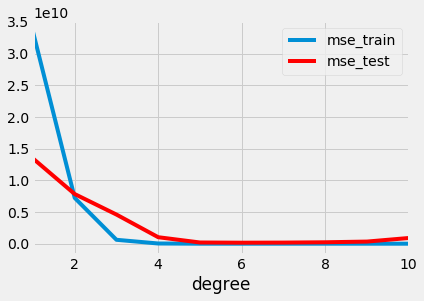

In [22]:
ax = plt.gca()

eval_df_split.plot(kind='line',x='degree',y='mse_train',ax=ax)
eval_df_split.plot(kind='line',x='degree',y='mse_test', color='red', ax=ax)

plt.show()

Optimal degree would be five.

In [23]:
def correct_training_flex(data, degree, perc_test):
    
    y=dataset.iloc[:,2].values
    X=dataset.iloc[:,1:2].values  
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=perc_test, random_state=42)
    
    poly_reg=PolynomialFeatures(degree=degree)
    X_poly=poly_reg.fit_transform(X_train)
    lin_reg=LinearRegression()
    lin_reg.fit(X_poly,y_train)
    pred_y_train = lin_reg.predict(poly_reg.fit_transform(X_train))
    pred_y_test = lin_reg.predict(poly_reg.fit_transform(X_test))
    
    return {'perc_test' : perc_test,
            'degree': degree, 
            'r2_train' : metrics.r2_score(y_train, pred_y_train),
            'mse_train' : metrics.mean_squared_error(y_train, pred_y_train),
            'r2_test' : metrics.r2_score(y_test, pred_y_test),
            'mse_test' : metrics.mean_squared_error(y_test, pred_y_test)
           }

In [24]:
def all_eval(data, perc_test):
    eval_list_split = [correct_training_flex(data, i, perc_test) for i in range(1, 11)]
    eval_df_split = pd.DataFrame(eval_list_split)
    
    return eval_df_split.loc[eval_df_split['mse_test'] == eval_df_split['mse_test'].min()][['perc_test', 'degree']]


In [25]:
df_allperc = pd.concat([all_eval(dataset, p) for p in (0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1)])
df_allperc['perc_train'] = 1 - df_allperc['perc_test']
df_allperc


,perc_test,degree,perc_train
4,0.8,5,0.2
2,0.7,3,0.3
6,0.6,7,0.4
6,0.5,7,0.5
9,0.4,10,0.6
5,0.3,6,0.7
4,0.2,5,0.8
5,0.1,6,0.9


In [26]:
print('In case of perc_train equals to 100%')
eval_df.loc[eval_df['mse'] == eval_df['mse'].min()]

In case of perc_train equals to 100%


,degree,r2,mse
9,10,1.0,0.000001


The optimal degree really depends on the ratio of training and test examples. It is always important to have a test set, but it should be not bigger than the traning set. When you tune your model on the training set, it could also make sense to have a validation set.